# Tanzanian Water Wells Project

Group members: Ely(Jinhui) Lin, Samantha Nasti, Titilayo(Teetee) Amuwo

## Overview

This notebook contains our steps to solving a data science predictive modeling classification problem, which is Tanzanian water access limitations. Our goal was to create a highly accurate predictive model to determine which water wells in Tanzania require repairs, which will ensure citizens can access clean drinking water.
After using our data to create various different types of machine learning models, and applying several bagging and boosting techniques to tweak and improve our models, we selected our CatBoost model to maximize the predictive capabilities of governmental agencies with large, categorical data sets.

## Business Problem

Limited clean water access is an issue affecting hundreds of millions of people worldwide. In Tanzania alone, over 57 million citizens are struggling with access to clean water, life’s most critical resource. Clean, safe water access is essential and critical to the health of families throughout Tanzania. Water is also essential to the country’s development as it is required for agricultural and industrial production. 
The issue of water supply in Tanzania is alarming, since there are vast amounts of fresh water available throughout the country, but there are an abundance of access issues with the country’s water wells. There is an obvious need to identify the wells that are non-functioning and preventing citizens from accessing a basic human right. 
Our model will allow governmental agencies and NGO to identify which water wells require repairs and take immediate action to improve the quality of life for citizens in need.

### End Users:

- The Tanzanian Government, NGOs

### True business problem:

- Create a model that can, if given data of the water wells , predict if the water well needs repair. 

### Context:

- **False positive** in this context: Predicts that an water well doesn't need repair but it actually does.
    - **Outcome**: The people can't get water from the well.
    
- **False negative** in this context: Predicts that an water well needs repair but it actually doesn't.

    - **Outcome**: Waste money/human resources on checking the well.

### Evaluation 

Most important metrics for evaluation:

- **Accuracy**
- **Precision**
- Recall
- F1-Score

We can focus on accuracy for ease of use, but should also be maximizing our Precision Score and minimizing False Positives, because false positives are more costly than false negatives.

## Data Understanding

We obtained our data set from the Driven Data competition (https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/), originally sourced from the Tanzanian Ministry of Water and supplied by Taarifa. 

### Training Set Values Exploration

In [1]:
# import pandas
import pandas as pd
# read training data values
X = pd.read_csv("../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", index_col='id')

In [2]:
X

amount_tsh date_recorded           funder  gps_height     installer  \
id                                                                           
69572      6000.0    2011-03-14            Roman        1390         Roman   
8776          0.0    2013-03-06          Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25     Lottery Club         686  World vision   
67743         0.0    2013-01-28           Unicef         263        UNICEF   
19728         0.0    2011-07-13      Action In A           0       Artisan   
...           ...           ...              ...         ...           ...   
60739        10.0    2013-05-03  Germany Republi        1210           CES   
27263      4700.0    2011-05-07      Cefa-njombe        1212          Cefa   
37057         0.0    2011-04-11              NaN           0           NaN   
31282         0.0    2011-03-08            Malec           0          Musa   
26348         0.0    2011-03-23       World Bank         191         World   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              Zahanati            0   
34310  37.460664  -3.821329           Kwa Mahundi            0   
67743  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728  31.130847  -1.825359               Shuleni            0   
...          ...        ...                   ...          ...   
60739  37.169807  -3.253847   Area Three Namba 27            0   
27263  35.249991  -9.070629     Kwa Yahona Kuvala            0   
37057  34.017087  -8.750434               Mashine            0   
31282  35.861315  -6.378573                Mshoro            0   
26348  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin  ... payment_type water_quality  quality_group  \
id                              ...                                             
69572               Lake Nyasa  ...     annually          soft           good   
8776             Lake Victoria  ...    never pay          soft           good   
34310                  Pangani  ...   per bucket          soft           good   
67743  Ruvuma / Southern Coast  ...    never pay          soft           good   
19728            Lake Victoria  ...    never pay          soft           good   
...                        ...  ...          ...           ...            ...   
60739                  Pangani  ...   per bucket          soft           good   
27263                   Rufiji  ...     annually          soft           good   
37057                   Rufiji  ...      monthly      fluoride       fluoride   
31282                   Rufiji  ...    never pay          soft           good   
26348              Wami / Ruvu  ...   on failure         salty          salty   

           quantity quantity_group                source  \
id                                                         
69572        enough         enough                spring   
8776   insufficient   insufficient  rainwater harvesting   
34310        enough         enough                   dam   
67743           dry            dry           machine dbh   
19728      seasonal       seasonal  rainwater harvesting   
...             ...            ...                   ...   
60739        enough         enough                spring   
27263        enough         enough                 river   
37057        enough         enough           machine dbh   
31282  insufficient   insufficient          shallow well   
26348        enough         enough          shallow well   

                source_type source_class              waterpoint_type  \
id                                                                      
69572                spring  groundwater           communal standpipe   
8776   rainwater harvesting      surface           communal standpipe   
34310 

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

The data set is pretty large and there are not that many null values

### Drop duplicated columns

From our data exploration process, we discovered that many columns are duplicates of each other, so we are going to drop them from our analysis. For detailed data exploration steps, refer to jupyter notebook named "EDA.ipynb" in notebooks/Samantha.

In [4]:
drop_columns = ["quantity_group", "source_type", "num_private", "waterpoint_type"]
X = X.drop(drop_columns, axis =1)

### y_train Exploration

In [5]:
y = pd.read_csv('../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv', index_col='id')
y

status_group
id                   
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
...               ...
60739      functional
27263      functional
37057      functional
31282      functional
26348      functional

[59400 rows x 1 columns]

In [6]:
# convert the dataframe into a series
y = y['status_group']

In [7]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Data Preparation

Water wells that require repairs should still be considered non functioning, since citizens are unable to rely on those to access clean drinking water. Therefore, we performed feature engineering to combine the two targets into one: 'needs_repair'.

### Train Test Split

We are not getting the target for our testing data so we are going to treat our training data as if that's all the data we got. So we'll split it into training data, validation data and a holdout set that we will only look at in the end.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, test_size = .1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

### Target Preprocessing

Our target has three unique values: functional, non functional and functional needs repair. It doesn't make much difference if the water well is non functional or functional needs repair because it requires attention regardless. The functional needs repair ones can break down at anytime and as a result, people who depend on the well to survive will suffer. For these reasons, we decide to simplify the problem into a binary prediction problem with 0 representing wells that needs repair and 1 representing wells that doesn't need repair (aka functional).

In [10]:
# set up a dictionary for mapping
map_dict = {"functional": 1, "non functional": 0, "functional needs repair": 0}

In [11]:
# map training set target
y_train = y_train.map(map_dict)

In [12]:
# map validation set target
y_val = y_val.map(map_dict)

In [13]:
# map holdout set target
y_holdout = y_holdout.map(map_dict)

### Imputing Nulls and Encoding Categorical Values

In [14]:
# imports for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [15]:
# Seperate columns into three categories:
# numeric columns, OneHotEncoder approriate columns and frequency encoded appropriate columns
num_cols = []
ohe_cols = []
freq_cols = []

# we pick a maximum unique value of 3 for columns to be onehotencoded for simplicity reasons

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 3:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [16]:
# see what these columns are
print(f'these are the numeric columns: {num_cols}')
print('')
print(f'these are the OHE columns:{ohe_cols}')
print('')
print(f'these are the frequency encoded columns:{freq_cols}')

these are the numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']

these are the OHE columns:['public_meeting', 'recorded_by', 'permit']

these are the frequency encoded columns:['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type_group']


In [17]:
# check which columns have null values that needs imputing
list=[]
for c in range(len(X.isna().any())):
    if X.isna().any()[c] == True:
        list.append(X.isna().any().index[c])
list

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [18]:
# set up pipeline for preprocessing 
# for numeric columns, we need to scale it
# for unique value <3 columns, we need to one hot encode it
# for unique value >3 columns, we need to frequency encode it
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols),
        ('scaler', num_transformer, num_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer...
                                  'extraction_type_group',
    

## Modeling

- We created a baseline model where we predict the majority class, iterated through maximizing precision scores and accuracy score while limiting overfitting.

- Logistic Regression is fast but not good at dealing with interaction terms and nonlinearity. Decision Trees and variations of decision tree models would be the most appropriate because our data is very categorical and has many interaction terms. We also want to have a generalizable model that runs fast, which rules our K Nearest Neighbor models. Our iteration process proves our intuition. 

In [19]:
# imports for modeling and visualization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [20]:
# build an evaluation function 
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te, normalize = 'pred', include_values=True, display_labels = ['Need Repair','Functional'], cmap=plt.cm.Blues)

### Baseline Understanding

First, we want to see how the baseline model where we predict the majority class everytime does so we know what to compare our score to.

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54508043, 0.54508043, 0.54508043, 0.54520514, 0.54520514])

Based on our dummy model assuming that all predictions will result in the majority class, we can see the dispersion of results - a little more than half of our waterwells are functioning.

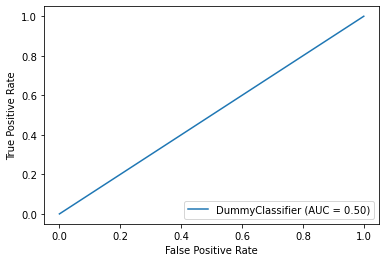

In [23]:
plot_roc_curve(dummy_model,X_train,y_train)

50% - not great results.

Accuracy Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Precision Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7056107954545455
Test - 0.7005347593582888
  
ROC_AUC: 
Train - 0.5
Test - 0.5
  
  
Confusion matrix for test data


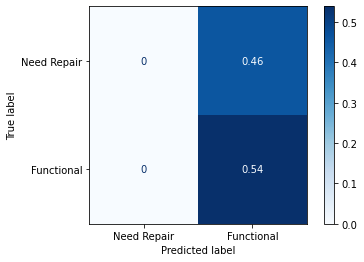

In [24]:
evaluate(dummy_model,X_train,y_train,X_val,y_val)

Since we combined our non-functional and functional needs repair targets, our target data is already pretty balanced. We will need to strengthen our model validation in order to determine what is a real prediction, and what is a result of random chance.

### Logistic Regression Modeling

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# set up logistic regression pipeline and cross validate it
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([2.04467106, 1.82449889, 1.78497577, 1.8497653 , 1.68000913]),
 'score_time': array([0.20511889, 0.21659398, 0.20320106, 0.22632599, 0.18353891]),
 'test_score': array([0.68150642, 0.68138172, 0.6775159 , 0.67015837, 0.67951116]),
 'train_score': array([0.67654945, 0.67651827, 0.67770296, 0.67542711, 0.67910587])}

The model can't find the minimum. Let's try another solver, saga, that can deal with large datasets.

In [27]:
# same thing with different solver
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='saga'))
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/an

{'fit_time': array([2.31545997, 2.46286416, 2.48339391, 2.45252109, 2.17140889]),
 'score_time': array([0.20575786, 0.24434566, 0.19271898, 0.23276472, 0.17154217]),
 'test_score': array([0.66404789, 0.66941015, 0.6515775 , 0.65057987, 0.66142911]),
 'train_score': array([0.67121836, 0.67436713, 0.67075072, 0.67471006, 0.67383714])}

In [28]:
# fit the model for evaluation
log_classifier.fit(X_train,y_train)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.6730265619154508
Test - 0.6596333707444818
  
Precision Score:
Train - 0.6797501130245366
Test - 0.6371334159438249
  
Recall Score: 
Train - 0.7566912202040537
Test - 0.8563497571131159
  
F1 Score: 
Train - 0.7161600415692386
Test - 0.7306530878086329
  
ROC_AUC: 
Train - 0.6647256956377215
Test - 0.6429476058292852
  
  
Confusion matrix for test data


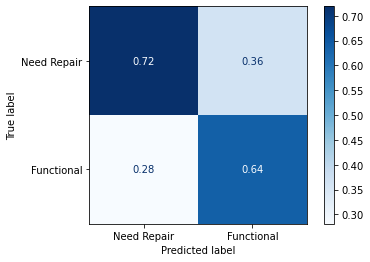

In [29]:
# print evaluation for logistic regression model
evaluate(log_classifier, X_train, y_train, X_val, y_val)

The model still didn't converge. Logistic regression is not very good at interaction terms which we'd expect in this dataset.

### KNN Modeling

In [30]:
# build a baseline Knn model
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [31]:
#Cross validate the X_train dataset
from sklearn.model_selection import cross_validate
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([1.6068418 , 1.58267903, 1.54419088, 1.61529517, 1.56107521]),
 'score_time': array([2.42304993, 2.09212613, 2.26035714, 2.27122378, 2.34180188]),
 'test_score': array([0.74622771, 0.73637611, 0.73338321, 0.74385834, 0.74385834]),
 'train_score': array([0.83292805, 0.83333333, 0.83429979, 0.83168101, 0.83146278])}

Accuracy Score:
Train - 0.8376106746477117
Test - 0.7524130190796857
  
Precision Score:
Train - 0.8348607838002967
Test - 0.7561135945306338
  
Recall Score: 
Train - 0.8752344786567232
Test - 0.7981956974323386
  
F1 Score: 
Train - 0.8545710392888253
Test - 0.7765849706299373
  
ROC_AUC: 
Train - 0.8338777942137658
Test - 0.7485296668979875
  
  
Confusion matrix for test data


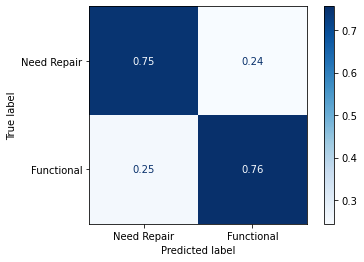

In [32]:
#Evaluate the function
Knn_classifier.fit(X_train,y_train)
evaluate(Knn_classifier, X_train, y_train, X_val, y_val)

KNN has good scores, way better than Logistic Regression, but as we add more data to the model, it's going to take more and more time to run. So we are not going to use KNN model. 

### Decision Tree Modeling

In [33]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# set up pipeline for decision tree models
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

In [34]:
# baseline decision tree model
cross_validate(dt, X_train, y_train, return_train_score = True)

{'fit_time': array([1.66684699, 1.60542631, 1.59589076, 1.58316398, 1.61341381]),
 'score_time': array([0.19067597, 0.21904373, 0.18195105, 0.21554899, 0.18789816]),
 'test_score': array([0.76094276, 0.76505799, 0.74460656, 0.76318743, 0.77403666]),
 'train_score': array([0.99947001, 0.99950118, 0.99956354, 0.99962589, 0.99950118])}

Accuracy Score:
Train - 0.9994762439206883
Test - 0.7735129068462402
  
Precision Score:
Train - 0.9998626499404817
Test - 0.7898973077990563
  
Recall Score: 
Train - 0.999176465205655
Test - 0.7900069396252603
  
F1 Score: 
Train - 0.9995194398041145
Test - 0.7899521199084033
  
ROC_AUC: 
Train - 0.9995059867425358
Test - 0.7721138594230198
  
  
Confusion matrix for test data


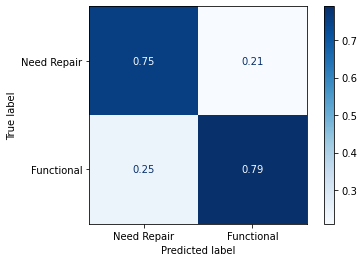

In [35]:
# fit the model and print out evaluation
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_val, y_val)

- The score is way better on the training set than the test set so the model is definitely overfitted, which is expected for an untuned decision tree model. 

#### Improve Decision Tree by Gridsearching

In [36]:
# import gridsearch function
from sklearn.model_selection import GridSearchCV

In [37]:
# correct for overfitting by limiting max depth and minimum samples split
dt_grid_params = {'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100]}

In [38]:
# Gridsearch for best precision score because that's what we want to maximize according to our business problem
dt_grid = GridSearchCV(dt, dt_grid_params, scoring = 'precision')
dt_output = dt_grid.fit(X_train, y_train)

In [39]:
# See the gridsearch result
dt_output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

In [40]:
# define the best model
dt_best_model = dt_output.best_estimator_

In [41]:
# cross validate best decision tree model
cross_validate(dt_best_model, X_train, y_train, return_train_score=True)

{'fit_time': array([1.56318688, 1.53793812, 1.51138616, 1.61672115, 1.49671197]),
 'score_time': array([0.19774699, 0.19366479, 0.22735596, 0.18990183, 0.18303323]),
 'test_score': array([0.7590722 , 0.76069335, 0.75433346, 0.75620402, 0.75370994]),
 'train_score': array([0.79224342, 0.79944507, 0.79794862, 0.79542337, 0.79589101])}

Accuracy Score:
Train - 0.7960842997880035
Test - 0.76109240553685
  
Precision Score:
Train - 0.7730847538823905
Test - 0.7401819923371648
  
Recall Score: 
Train - 0.8859861829162282
Test - 0.8580152671755725
  
F1 Score: 
Train - 0.8256939410736367
Test - 0.7947547727710998
  
ROC_AUC: 
Train - 0.7871646014921091
Test - 0.7528712699514226
  
  
Confusion matrix for test data


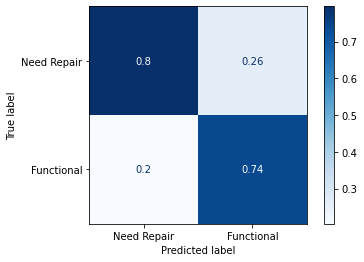

In [42]:
#Evaluate the model
evaluate(dt_best_model, X_train, y_train, X_val, y_val)

#### Random Forest

In [43]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
# setting up pipeline for random forest models
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [45]:
# set up parameter grid
rfc_grid_params = {'classifier__n_estimators': [1,10,100], 'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100], 'classifier__max_features': ['sqrt','log2', None], 'classifier__max_samples': [0.1,0.3,0.5]}

In [46]:
# Gridsearch for best precision score 
rfc_grid = GridSearchCV(rfc, rfc_grid_params, scoring = 'precision')
rfc_output = rfc_grid.fit(X_train, y_train)

In [47]:
# See the gridsearch result
rfc_output.best_params_

{'classifier__max_depth': 10,
 'classifier__max_features': 'sqrt',
 'classifier__max_samples': 0.5,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100}

In [48]:
# define the best random forest model
rfc_best_model = rfc_output.best_estimator_

In [49]:
# cross validate best random forest model
cross_validate(rfc_best_model, X_train, y_train, return_train_score=True)

{'fit_time': array([2.91965079, 2.81539392, 2.82798576, 2.83933902, 2.77953935]),
 'score_time': array([0.25489926, 0.2410419 , 0.24717021, 0.2430799 , 0.24077868]),
 'test_score': array([0.79299164, 0.78314004, 0.78737997, 0.78413767, 0.78600823]),
 'train_score': array([0.82036414, 0.82083177, 0.81793241, 0.81917945, 0.82195411])}

Accuracy Score:
Train - 0.8186556927297668
Test - 0.7845866068088291
  
Precision Score:
Train - 0.7787630915067656
Test - 0.7460191082802548
  
Recall Score: 
Train - 0.9321498833325708
Test - 0.9103400416377515
  
F1 Score: 
Train - 0.8485807701118306
Test - 0.8200287553916359
  
ROC_AUC: 
Train - 0.8073952618768347
Test - 0.7739200208188757
  
  
Confusion matrix for test data


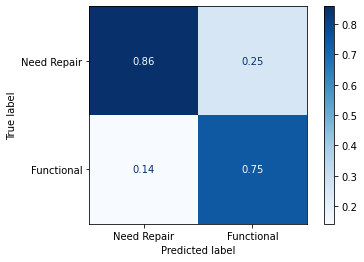

In [50]:
# Evaluate the model
evaluate(rfc_best_model, X_train, y_train, X_val, y_val)

#### Catboost

In [51]:
# import catboost functions
from catboost import CatBoostClassifier

In [52]:
# set up pipeline for catboost classifier
cbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier())])

In [53]:
# fit catboost classifier
cbc.fit(X_train, y_train)

Learning rate set to 0.049826
0:	learn: 0.6755647	total: 71.4ms	remaining: 1m 11s
1:	learn: 0.6599110	total: 80.1ms	remaining: 40s
2:	learn: 0.6463422	total: 91.1ms	remaining: 30.3s
3:	learn: 0.6348247	total: 102ms	remaining: 25.3s
4:	learn: 0.6266172	total: 113ms	remaining: 22.5s
5:	learn: 0.6192409	total: 125ms	remaining: 20.7s
6:	learn: 0.6103050	total: 137ms	remaining: 19.4s
7:	learn: 0.6025273	total: 148ms	remaining: 18.3s
8:	learn: 0.5965877	total: 158ms	remaining: 17.4s
9:	learn: 0.5904847	total: 170ms	remaining: 16.8s
10:	learn: 0.5851902	total: 180ms	remaining: 16.2s
11:	learn: 0.5802419	total: 193ms	remaining: 15.9s
12:	learn: 0.5759181	total: 206ms	remaining: 15.6s
13:	learn: 0.5724812	total: 217ms	remaining: 15.3s
14:	learn: 0.5680805	total: 228ms	remaining: 15s
15:	learn: 0.5638960	total: 239ms	remaining: 14.7s
16:	learn: 0.5607442	total: 250ms	remaining: 14.4s
17:	learn: 0.5576339	total: 260ms	remaining: 14.2s
18:	learn: 0.5554012	total: 271ms	remaining: 14s
19:	learn: 0.

175:	learn: 0.4506514	total: 2.04s	remaining: 9.55s
176:	learn: 0.4503062	total: 2.05s	remaining: 9.53s
177:	learn: 0.4501128	total: 2.06s	remaining: 9.52s
178:	learn: 0.4499207	total: 2.07s	remaining: 9.5s
179:	learn: 0.4496979	total: 2.08s	remaining: 9.48s
180:	learn: 0.4493056	total: 2.09s	remaining: 9.46s
181:	learn: 0.4489028	total: 2.1s	remaining: 9.45s
182:	learn: 0.4487556	total: 2.11s	remaining: 9.44s
183:	learn: 0.4483486	total: 2.13s	remaining: 9.43s
184:	learn: 0.4481682	total: 2.14s	remaining: 9.42s
185:	learn: 0.4479646	total: 2.15s	remaining: 9.41s
186:	learn: 0.4477520	total: 2.16s	remaining: 9.4s
187:	learn: 0.4475488	total: 2.17s	remaining: 9.39s
188:	learn: 0.4473492	total: 2.18s	remaining: 9.38s
189:	learn: 0.4469501	total: 2.19s	remaining: 9.36s
190:	learn: 0.4466470	total: 2.21s	remaining: 9.34s
191:	learn: 0.4463095	total: 2.22s	remaining: 9.33s
192:	learn: 0.4460746	total: 2.23s	remaining: 9.32s
193:	learn: 0.4457474	total: 2.24s	remaining: 9.3s
194:	learn: 0.44

337:	learn: 0.4168152	total: 3.86s	remaining: 7.56s
338:	learn: 0.4166478	total: 3.87s	remaining: 7.55s
339:	learn: 0.4164730	total: 3.88s	remaining: 7.54s
340:	learn: 0.4161953	total: 3.89s	remaining: 7.52s
341:	learn: 0.4159475	total: 3.9s	remaining: 7.51s
342:	learn: 0.4157114	total: 3.91s	remaining: 7.5s
343:	learn: 0.4155065	total: 3.92s	remaining: 7.49s
344:	learn: 0.4152995	total: 3.94s	remaining: 7.48s
345:	learn: 0.4151518	total: 3.95s	remaining: 7.46s
346:	learn: 0.4150028	total: 3.96s	remaining: 7.45s
347:	learn: 0.4147729	total: 3.97s	remaining: 7.44s
348:	learn: 0.4146771	total: 3.98s	remaining: 7.43s
349:	learn: 0.4144249	total: 3.99s	remaining: 7.42s
350:	learn: 0.4142391	total: 4s	remaining: 7.4s
351:	learn: 0.4140377	total: 4.01s	remaining: 7.39s
352:	learn: 0.4139013	total: 4.03s	remaining: 7.38s
353:	learn: 0.4137647	total: 4.04s	remaining: 7.37s
354:	learn: 0.4136329	total: 4.05s	remaining: 7.36s
355:	learn: 0.4134862	total: 4.06s	remaining: 7.35s
356:	learn: 0.4133

503:	learn: 0.3943411	total: 5.7s	remaining: 5.61s
504:	learn: 0.3942081	total: 5.71s	remaining: 5.6s
505:	learn: 0.3941581	total: 5.72s	remaining: 5.58s
506:	learn: 0.3940612	total: 5.73s	remaining: 5.57s
507:	learn: 0.3939420	total: 5.74s	remaining: 5.56s
508:	learn: 0.3938585	total: 5.75s	remaining: 5.55s
509:	learn: 0.3937550	total: 5.76s	remaining: 5.54s
510:	learn: 0.3936651	total: 5.78s	remaining: 5.53s
511:	learn: 0.3935615	total: 5.79s	remaining: 5.52s
512:	learn: 0.3934503	total: 5.8s	remaining: 5.51s
513:	learn: 0.3932807	total: 5.81s	remaining: 5.5s
514:	learn: 0.3931485	total: 5.82s	remaining: 5.49s
515:	learn: 0.3930904	total: 5.83s	remaining: 5.47s
516:	learn: 0.3930596	total: 5.84s	remaining: 5.46s
517:	learn: 0.3929362	total: 5.86s	remaining: 5.45s
518:	learn: 0.3928432	total: 5.87s	remaining: 5.44s
519:	learn: 0.3927855	total: 5.88s	remaining: 5.43s
520:	learn: 0.3926490	total: 5.89s	remaining: 5.42s
521:	learn: 0.3924833	total: 5.9s	remaining: 5.4s
522:	learn: 0.3923

667:	learn: 0.3778242	total: 7.52s	remaining: 3.74s
668:	learn: 0.3776751	total: 7.53s	remaining: 3.73s
669:	learn: 0.3775510	total: 7.54s	remaining: 3.72s
670:	learn: 0.3774580	total: 7.55s	remaining: 3.7s
671:	learn: 0.3773887	total: 7.57s	remaining: 3.69s
672:	learn: 0.3773076	total: 7.58s	remaining: 3.68s
673:	learn: 0.3772282	total: 7.59s	remaining: 3.67s
674:	learn: 0.3771433	total: 7.6s	remaining: 3.66s
675:	learn: 0.3770814	total: 7.61s	remaining: 3.65s
676:	learn: 0.3769871	total: 7.62s	remaining: 3.63s
677:	learn: 0.3768843	total: 7.63s	remaining: 3.62s
678:	learn: 0.3768260	total: 7.64s	remaining: 3.61s
679:	learn: 0.3767587	total: 7.65s	remaining: 3.6s
680:	learn: 0.3766768	total: 7.66s	remaining: 3.59s
681:	learn: 0.3766008	total: 7.67s	remaining: 3.58s
682:	learn: 0.3764755	total: 7.68s	remaining: 3.57s
683:	learn: 0.3763925	total: 7.7s	remaining: 3.56s
684:	learn: 0.3763171	total: 7.71s	remaining: 3.54s
685:	learn: 0.3762098	total: 7.72s	remaining: 3.53s
686:	learn: 0.37

836:	learn: 0.3634497	total: 9.38s	remaining: 1.83s
837:	learn: 0.3633915	total: 9.39s	remaining: 1.81s
838:	learn: 0.3633211	total: 9.4s	remaining: 1.8s
839:	learn: 0.3632673	total: 9.41s	remaining: 1.79s
840:	learn: 0.3631807	total: 9.43s	remaining: 1.78s
841:	learn: 0.3631489	total: 9.44s	remaining: 1.77s
842:	learn: 0.3630773	total: 9.45s	remaining: 1.76s
843:	learn: 0.3630054	total: 9.46s	remaining: 1.75s
844:	learn: 0.3629256	total: 9.47s	remaining: 1.74s
845:	learn: 0.3628593	total: 9.48s	remaining: 1.73s
846:	learn: 0.3628016	total: 9.49s	remaining: 1.71s
847:	learn: 0.3627392	total: 9.5s	remaining: 1.7s
848:	learn: 0.3626856	total: 9.51s	remaining: 1.69s
849:	learn: 0.3625901	total: 9.52s	remaining: 1.68s
850:	learn: 0.3625217	total: 9.53s	remaining: 1.67s
851:	learn: 0.3624348	total: 9.55s	remaining: 1.66s
852:	learn: 0.3623389	total: 9.56s	remaining: 1.65s
853:	learn: 0.3623055	total: 9.57s	remaining: 1.64s
854:	learn: 0.3621852	total: 9.58s	remaining: 1.62s
855:	learn: 0.36

999:	learn: 0.3517971	total: 11.2s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

In [54]:
# cross validate catboost model
cross_validate(cbc, X_train, y_train, return_train_score=True)

Learning rate set to 0.045297
0:	learn: 0.6770460	total: 8.62ms	remaining: 8.61s
1:	learn: 0.6626509	total: 18.4ms	remaining: 9.16s
2:	learn: 0.6499006	total: 27.4ms	remaining: 9.12s
3:	learn: 0.6388641	total: 37ms	remaining: 9.22s
4:	learn: 0.6310965	total: 47.7ms	remaining: 9.5s
5:	learn: 0.6219175	total: 57.5ms	remaining: 9.52s
6:	learn: 0.6161227	total: 67.4ms	remaining: 9.56s
7:	learn: 0.6083542	total: 76.6ms	remaining: 9.5s
8:	learn: 0.6031316	total: 87.9ms	remaining: 9.68s
9:	learn: 0.5964889	total: 97.6ms	remaining: 9.66s
10:	learn: 0.5917977	total: 108ms	remaining: 9.7s
11:	learn: 0.5872875	total: 118ms	remaining: 9.74s
12:	learn: 0.5830600	total: 129ms	remaining: 9.77s
13:	learn: 0.5788736	total: 139ms	remaining: 9.77s
14:	learn: 0.5739538	total: 148ms	remaining: 9.69s
15:	learn: 0.5700279	total: 156ms	remaining: 9.62s
16:	learn: 0.5673450	total: 167ms	remaining: 9.65s
17:	learn: 0.5641976	total: 176ms	remaining: 9.58s
18:	learn: 0.5603258	total: 184ms	remaining: 9.52s
19:	le

161:	learn: 0.4587612	total: 1.64s	remaining: 8.48s
162:	learn: 0.4585454	total: 1.65s	remaining: 8.47s
163:	learn: 0.4583030	total: 1.66s	remaining: 8.47s
164:	learn: 0.4581635	total: 1.67s	remaining: 8.46s
165:	learn: 0.4579115	total: 1.68s	remaining: 8.44s
166:	learn: 0.4576935	total: 1.69s	remaining: 8.43s
167:	learn: 0.4573810	total: 1.7s	remaining: 8.42s
168:	learn: 0.4568537	total: 1.71s	remaining: 8.42s
169:	learn: 0.4565788	total: 1.72s	remaining: 8.41s
170:	learn: 0.4563885	total: 1.73s	remaining: 8.41s
171:	learn: 0.4562047	total: 1.74s	remaining: 8.39s
172:	learn: 0.4559340	total: 1.75s	remaining: 8.38s
173:	learn: 0.4556664	total: 1.76s	remaining: 8.36s
174:	learn: 0.4554189	total: 1.77s	remaining: 8.35s
175:	learn: 0.4551147	total: 1.78s	remaining: 8.35s
176:	learn: 0.4548419	total: 1.79s	remaining: 8.34s
177:	learn: 0.4546375	total: 1.8s	remaining: 8.32s
178:	learn: 0.4544658	total: 1.81s	remaining: 8.32s
179:	learn: 0.4541507	total: 1.82s	remaining: 8.3s
180:	learn: 0.4

322:	learn: 0.4235382	total: 3.28s	remaining: 6.87s
323:	learn: 0.4234064	total: 3.29s	remaining: 6.86s
324:	learn: 0.4233005	total: 3.3s	remaining: 6.85s
325:	learn: 0.4231622	total: 3.31s	remaining: 6.84s
326:	learn: 0.4229414	total: 3.32s	remaining: 6.83s
327:	learn: 0.4226923	total: 3.33s	remaining: 6.82s
328:	learn: 0.4224255	total: 3.34s	remaining: 6.81s
329:	learn: 0.4223386	total: 3.35s	remaining: 6.8s
330:	learn: 0.4221870	total: 3.36s	remaining: 6.79s
331:	learn: 0.4220338	total: 3.37s	remaining: 6.78s
332:	learn: 0.4219205	total: 3.38s	remaining: 6.77s
333:	learn: 0.4217328	total: 3.39s	remaining: 6.76s
334:	learn: 0.4215207	total: 3.4s	remaining: 6.75s
335:	learn: 0.4212575	total: 3.41s	remaining: 6.74s
336:	learn: 0.4210521	total: 3.42s	remaining: 6.73s
337:	learn: 0.4209425	total: 3.43s	remaining: 6.72s
338:	learn: 0.4207063	total: 3.44s	remaining: 6.71s
339:	learn: 0.4205788	total: 3.45s	remaining: 6.7s
340:	learn: 0.4204426	total: 3.46s	remaining: 6.69s
341:	learn: 0.42

482:	learn: 0.4002077	total: 4.91s	remaining: 5.26s
483:	learn: 0.4000841	total: 4.92s	remaining: 5.25s
484:	learn: 0.3999423	total: 4.93s	remaining: 5.24s
485:	learn: 0.3998313	total: 4.94s	remaining: 5.23s
486:	learn: 0.3997212	total: 4.95s	remaining: 5.22s
487:	learn: 0.3996188	total: 4.97s	remaining: 5.21s
488:	learn: 0.3995502	total: 4.98s	remaining: 5.2s
489:	learn: 0.3993916	total: 4.99s	remaining: 5.19s
490:	learn: 0.3992568	total: 5s	remaining: 5.18s
491:	learn: 0.3991126	total: 5s	remaining: 5.17s
492:	learn: 0.3989754	total: 5.01s	remaining: 5.16s
493:	learn: 0.3988674	total: 5.02s	remaining: 5.15s
494:	learn: 0.3986872	total: 5.04s	remaining: 5.14s
495:	learn: 0.3985652	total: 5.05s	remaining: 5.13s
496:	learn: 0.3984431	total: 5.06s	remaining: 5.12s
497:	learn: 0.3983277	total: 5.07s	remaining: 5.11s
498:	learn: 0.3981874	total: 5.07s	remaining: 5.09s
499:	learn: 0.3980594	total: 5.08s	remaining: 5.08s
500:	learn: 0.3979630	total: 5.09s	remaining: 5.08s
501:	learn: 0.39776

641:	learn: 0.3824059	total: 6.54s	remaining: 3.65s
642:	learn: 0.3823253	total: 6.55s	remaining: 3.64s
643:	learn: 0.3821728	total: 6.56s	remaining: 3.63s
644:	learn: 0.3820268	total: 6.57s	remaining: 3.62s
645:	learn: 0.3819111	total: 6.58s	remaining: 3.61s
646:	learn: 0.3817681	total: 6.6s	remaining: 3.6s
647:	learn: 0.3816477	total: 6.61s	remaining: 3.59s
648:	learn: 0.3815139	total: 6.62s	remaining: 3.58s
649:	learn: 0.3814151	total: 6.63s	remaining: 3.57s
650:	learn: 0.3812853	total: 6.64s	remaining: 3.56s
651:	learn: 0.3812045	total: 6.65s	remaining: 3.55s
652:	learn: 0.3811246	total: 6.66s	remaining: 3.54s
653:	learn: 0.3810446	total: 6.67s	remaining: 3.53s
654:	learn: 0.3810027	total: 6.68s	remaining: 3.52s
655:	learn: 0.3808828	total: 6.69s	remaining: 3.51s
656:	learn: 0.3808077	total: 6.7s	remaining: 3.5s
657:	learn: 0.3806938	total: 6.71s	remaining: 3.49s
658:	learn: 0.3806198	total: 6.72s	remaining: 3.48s
659:	learn: 0.3805505	total: 6.73s	remaining: 3.47s
660:	learn: 0.38

800:	learn: 0.3669610	total: 8.17s	remaining: 2.03s
801:	learn: 0.3669301	total: 8.19s	remaining: 2.02s
802:	learn: 0.3668122	total: 8.2s	remaining: 2.01s
803:	learn: 0.3667284	total: 8.21s	remaining: 2s
804:	learn: 0.3665987	total: 8.22s	remaining: 1.99s
805:	learn: 0.3665005	total: 8.23s	remaining: 1.98s
806:	learn: 0.3664267	total: 8.24s	remaining: 1.97s
807:	learn: 0.3663473	total: 8.25s	remaining: 1.96s
808:	learn: 0.3662840	total: 8.26s	remaining: 1.95s
809:	learn: 0.3661833	total: 8.27s	remaining: 1.94s
810:	learn: 0.3661028	total: 8.28s	remaining: 1.93s
811:	learn: 0.3660029	total: 8.29s	remaining: 1.92s
812:	learn: 0.3659208	total: 8.3s	remaining: 1.91s
813:	learn: 0.3658081	total: 8.31s	remaining: 1.9s
814:	learn: 0.3657645	total: 8.32s	remaining: 1.89s
815:	learn: 0.3656754	total: 8.33s	remaining: 1.88s
816:	learn: 0.3656348	total: 8.34s	remaining: 1.87s
817:	learn: 0.3655442	total: 8.35s	remaining: 1.86s
818:	learn: 0.3654138	total: 8.36s	remaining: 1.85s
819:	learn: 0.3653

959:	learn: 0.3538675	total: 9.8s	remaining: 408ms
960:	learn: 0.3537806	total: 9.81s	remaining: 398ms
961:	learn: 0.3536868	total: 9.82s	remaining: 388ms
962:	learn: 0.3536194	total: 9.83s	remaining: 378ms
963:	learn: 0.3535638	total: 9.84s	remaining: 367ms
964:	learn: 0.3534563	total: 9.85s	remaining: 357ms
965:	learn: 0.3533963	total: 9.86s	remaining: 347ms
966:	learn: 0.3533056	total: 9.87s	remaining: 337ms
967:	learn: 0.3532596	total: 9.88s	remaining: 327ms
968:	learn: 0.3532016	total: 9.89s	remaining: 316ms
969:	learn: 0.3530789	total: 9.9s	remaining: 306ms
970:	learn: 0.3529640	total: 9.91s	remaining: 296ms
971:	learn: 0.3528728	total: 9.92s	remaining: 286ms
972:	learn: 0.3527894	total: 9.93s	remaining: 276ms
973:	learn: 0.3527079	total: 9.94s	remaining: 265ms
974:	learn: 0.3526212	total: 9.95s	remaining: 255ms
975:	learn: 0.3525071	total: 9.96s	remaining: 245ms
976:	learn: 0.3524534	total: 9.97s	remaining: 235ms
977:	learn: 0.3523995	total: 9.98s	remaining: 225ms
978:	learn: 0.

130:	learn: 0.4667483	total: 1.43s	remaining: 9.47s
131:	learn: 0.4662368	total: 1.44s	remaining: 9.45s
132:	learn: 0.4655755	total: 1.45s	remaining: 9.46s
133:	learn: 0.4653481	total: 1.46s	remaining: 9.45s
134:	learn: 0.4649455	total: 1.47s	remaining: 9.43s
135:	learn: 0.4646159	total: 1.48s	remaining: 9.41s
136:	learn: 0.4642182	total: 1.49s	remaining: 9.4s
137:	learn: 0.4639141	total: 1.5s	remaining: 9.39s
138:	learn: 0.4636738	total: 1.51s	remaining: 9.37s
139:	learn: 0.4631448	total: 1.52s	remaining: 9.36s
140:	learn: 0.4627998	total: 1.53s	remaining: 9.33s
141:	learn: 0.4624812	total: 1.54s	remaining: 9.32s
142:	learn: 0.4623642	total: 1.55s	remaining: 9.3s
143:	learn: 0.4620772	total: 1.56s	remaining: 9.29s
144:	learn: 0.4617615	total: 1.57s	remaining: 9.28s
145:	learn: 0.4614113	total: 1.58s	remaining: 9.26s
146:	learn: 0.4609520	total: 1.59s	remaining: 9.24s
147:	learn: 0.4606665	total: 1.6s	remaining: 9.22s
148:	learn: 0.4602881	total: 1.61s	remaining: 9.22s
149:	learn: 0.46

304:	learn: 0.4234279	total: 3.29s	remaining: 7.51s
305:	learn: 0.4231190	total: 3.3s	remaining: 7.49s
306:	learn: 0.4229657	total: 3.31s	remaining: 7.48s
307:	learn: 0.4227490	total: 3.33s	remaining: 7.47s
308:	learn: 0.4225918	total: 3.33s	remaining: 7.46s
309:	learn: 0.4223614	total: 3.35s	remaining: 7.45s
310:	learn: 0.4221817	total: 3.36s	remaining: 7.44s
311:	learn: 0.4219996	total: 3.37s	remaining: 7.42s
312:	learn: 0.4218074	total: 3.38s	remaining: 7.41s
313:	learn: 0.4215746	total: 3.39s	remaining: 7.4s
314:	learn: 0.4213185	total: 3.4s	remaining: 7.39s
315:	learn: 0.4211269	total: 3.41s	remaining: 7.38s
316:	learn: 0.4208677	total: 3.42s	remaining: 7.37s
317:	learn: 0.4206740	total: 3.43s	remaining: 7.35s
318:	learn: 0.4204387	total: 3.44s	remaining: 7.34s
319:	learn: 0.4202944	total: 3.45s	remaining: 7.33s
320:	learn: 0.4201737	total: 3.46s	remaining: 7.32s
321:	learn: 0.4200158	total: 3.47s	remaining: 7.31s
322:	learn: 0.4198577	total: 3.48s	remaining: 7.3s
323:	learn: 0.41

481:	learn: 0.3963061	total: 5.13s	remaining: 5.51s
482:	learn: 0.3961580	total: 5.14s	remaining: 5.5s
483:	learn: 0.3959771	total: 5.15s	remaining: 5.49s
484:	learn: 0.3958785	total: 5.16s	remaining: 5.48s
485:	learn: 0.3957251	total: 5.17s	remaining: 5.46s
486:	learn: 0.3955653	total: 5.18s	remaining: 5.46s
487:	learn: 0.3954730	total: 5.19s	remaining: 5.44s
488:	learn: 0.3954247	total: 5.2s	remaining: 5.43s
489:	learn: 0.3953308	total: 5.21s	remaining: 5.42s
490:	learn: 0.3952711	total: 5.22s	remaining: 5.41s
491:	learn: 0.3951664	total: 5.23s	remaining: 5.4s
492:	learn: 0.3950659	total: 5.24s	remaining: 5.39s
493:	learn: 0.3949480	total: 5.25s	remaining: 5.38s
494:	learn: 0.3948577	total: 5.26s	remaining: 5.36s
495:	learn: 0.3947157	total: 5.27s	remaining: 5.35s
496:	learn: 0.3946480	total: 5.28s	remaining: 5.34s
497:	learn: 0.3945099	total: 5.29s	remaining: 5.33s
498:	learn: 0.3943835	total: 5.3s	remaining: 5.32s
499:	learn: 0.3942442	total: 5.3s	remaining: 5.3s
500:	learn: 0.3941

642:	learn: 0.3784406	total: 6.74s	remaining: 3.74s
643:	learn: 0.3782699	total: 6.75s	remaining: 3.73s
644:	learn: 0.3781578	total: 6.76s	remaining: 3.72s
645:	learn: 0.3780802	total: 6.77s	remaining: 3.71s
646:	learn: 0.3779832	total: 6.78s	remaining: 3.7s
647:	learn: 0.3778803	total: 6.79s	remaining: 3.69s
648:	learn: 0.3777798	total: 6.8s	remaining: 3.68s
649:	learn: 0.3776721	total: 6.81s	remaining: 3.67s
650:	learn: 0.3775810	total: 6.83s	remaining: 3.66s
651:	learn: 0.3775161	total: 6.83s	remaining: 3.65s
652:	learn: 0.3774350	total: 6.84s	remaining: 3.64s
653:	learn: 0.3773516	total: 6.86s	remaining: 3.63s
654:	learn: 0.3772223	total: 6.87s	remaining: 3.62s
655:	learn: 0.3771200	total: 6.88s	remaining: 3.6s
656:	learn: 0.3770240	total: 6.89s	remaining: 3.6s
657:	learn: 0.3769607	total: 6.89s	remaining: 3.58s
658:	learn: 0.3768702	total: 6.91s	remaining: 3.57s
659:	learn: 0.3767898	total: 6.92s	remaining: 3.56s
660:	learn: 0.3766783	total: 6.92s	remaining: 3.55s
661:	learn: 0.37

804:	learn: 0.3637766	total: 8.37s	remaining: 2.03s
805:	learn: 0.3636749	total: 8.38s	remaining: 2.02s
806:	learn: 0.3635389	total: 8.39s	remaining: 2.01s
807:	learn: 0.3634413	total: 8.4s	remaining: 2s
808:	learn: 0.3633451	total: 8.41s	remaining: 1.99s
809:	learn: 0.3633129	total: 8.42s	remaining: 1.97s
810:	learn: 0.3632113	total: 8.43s	remaining: 1.96s
811:	learn: 0.3631302	total: 8.44s	remaining: 1.95s
812:	learn: 0.3630378	total: 8.45s	remaining: 1.94s
813:	learn: 0.3629825	total: 8.46s	remaining: 1.93s
814:	learn: 0.3628992	total: 8.47s	remaining: 1.92s
815:	learn: 0.3628450	total: 8.48s	remaining: 1.91s
816:	learn: 0.3627292	total: 8.49s	remaining: 1.9s
817:	learn: 0.3626660	total: 8.5s	remaining: 1.89s
818:	learn: 0.3625922	total: 8.51s	remaining: 1.88s
819:	learn: 0.3625094	total: 8.52s	remaining: 1.87s
820:	learn: 0.3624124	total: 8.53s	remaining: 1.86s
821:	learn: 0.3623398	total: 8.54s	remaining: 1.85s
822:	learn: 0.3622542	total: 8.55s	remaining: 1.84s
823:	learn: 0.3621

965:	learn: 0.3508329	total: 10s	remaining: 352ms
966:	learn: 0.3507331	total: 10s	remaining: 342ms
967:	learn: 0.3506821	total: 10s	remaining: 331ms
968:	learn: 0.3506280	total: 10s	remaining: 321ms
969:	learn: 0.3505601	total: 10s	remaining: 310ms
970:	learn: 0.3504952	total: 10.1s	remaining: 300ms
971:	learn: 0.3504150	total: 10.1s	remaining: 290ms
972:	learn: 0.3503432	total: 10.1s	remaining: 279ms
973:	learn: 0.3502683	total: 10.1s	remaining: 269ms
974:	learn: 0.3501610	total: 10.1s	remaining: 259ms
975:	learn: 0.3500936	total: 10.1s	remaining: 248ms
976:	learn: 0.3500355	total: 10.1s	remaining: 238ms
977:	learn: 0.3499641	total: 10.1s	remaining: 228ms
978:	learn: 0.3498732	total: 10.1s	remaining: 217ms
979:	learn: 0.3498527	total: 10.1s	remaining: 207ms
980:	learn: 0.3497546	total: 10.2s	remaining: 197ms
981:	learn: 0.3496710	total: 10.2s	remaining: 186ms
982:	learn: 0.3495717	total: 10.2s	remaining: 176ms
983:	learn: 0.3494701	total: 10.2s	remaining: 166ms
984:	learn: 0.3494157	

139:	learn: 0.4641998	total: 1.41s	remaining: 8.67s
140:	learn: 0.4637559	total: 1.42s	remaining: 8.66s
141:	learn: 0.4635238	total: 1.43s	remaining: 8.65s
142:	learn: 0.4632484	total: 1.44s	remaining: 8.64s
143:	learn: 0.4629686	total: 1.45s	remaining: 8.62s
144:	learn: 0.4626640	total: 1.46s	remaining: 8.61s
145:	learn: 0.4623472	total: 1.47s	remaining: 8.6s
146:	learn: 0.4620257	total: 1.48s	remaining: 8.59s
147:	learn: 0.4618382	total: 1.49s	remaining: 8.57s
148:	learn: 0.4615010	total: 1.5s	remaining: 8.55s
149:	learn: 0.4610418	total: 1.51s	remaining: 8.55s
150:	learn: 0.4606662	total: 1.52s	remaining: 8.54s
151:	learn: 0.4604280	total: 1.53s	remaining: 8.52s
152:	learn: 0.4601802	total: 1.54s	remaining: 8.52s
153:	learn: 0.4600668	total: 1.55s	remaining: 8.51s
154:	learn: 0.4598472	total: 1.56s	remaining: 8.5s
155:	learn: 0.4595964	total: 1.57s	remaining: 8.49s
156:	learn: 0.4593411	total: 1.58s	remaining: 8.48s
157:	learn: 0.4589771	total: 1.59s	remaining: 8.47s
158:	learn: 0.4

300:	learn: 0.4252377	total: 3.04s	remaining: 7.06s
301:	learn: 0.4250654	total: 3.05s	remaining: 7.05s
302:	learn: 0.4248465	total: 3.06s	remaining: 7.04s
303:	learn: 0.4246830	total: 3.07s	remaining: 7.03s
304:	learn: 0.4244814	total: 3.08s	remaining: 7.02s
305:	learn: 0.4242896	total: 3.09s	remaining: 7.01s
306:	learn: 0.4241118	total: 3.1s	remaining: 7s
307:	learn: 0.4238973	total: 3.11s	remaining: 6.99s
308:	learn: 0.4236828	total: 3.12s	remaining: 6.98s
309:	learn: 0.4235407	total: 3.13s	remaining: 6.97s
310:	learn: 0.4232778	total: 3.14s	remaining: 6.97s
311:	learn: 0.4229366	total: 3.16s	remaining: 6.96s
312:	learn: 0.4227861	total: 3.17s	remaining: 6.95s
313:	learn: 0.4225042	total: 3.17s	remaining: 6.94s
314:	learn: 0.4223580	total: 3.19s	remaining: 6.93s
315:	learn: 0.4221355	total: 3.19s	remaining: 6.91s
316:	learn: 0.4219861	total: 3.2s	remaining: 6.9s
317:	learn: 0.4217687	total: 3.21s	remaining: 6.9s
318:	learn: 0.4215129	total: 3.23s	remaining: 6.89s
319:	learn: 0.42137

459:	learn: 0.4003456	total: 4.67s	remaining: 5.49s
460:	learn: 0.4002006	total: 4.68s	remaining: 5.47s
461:	learn: 0.4000848	total: 4.69s	remaining: 5.46s
462:	learn: 0.3999634	total: 4.7s	remaining: 5.46s
463:	learn: 0.3998003	total: 4.71s	remaining: 5.45s
464:	learn: 0.3996931	total: 4.72s	remaining: 5.43s
465:	learn: 0.3995667	total: 4.74s	remaining: 5.43s
466:	learn: 0.3994314	total: 4.75s	remaining: 5.42s
467:	learn: 0.3993000	total: 4.76s	remaining: 5.41s
468:	learn: 0.3991567	total: 4.77s	remaining: 5.4s
469:	learn: 0.3990337	total: 4.78s	remaining: 5.39s
470:	learn: 0.3989326	total: 4.79s	remaining: 5.38s
471:	learn: 0.3987749	total: 4.8s	remaining: 5.37s
472:	learn: 0.3986843	total: 4.81s	remaining: 5.36s
473:	learn: 0.3984987	total: 4.82s	remaining: 5.35s
474:	learn: 0.3983465	total: 4.83s	remaining: 5.34s
475:	learn: 0.3981818	total: 4.84s	remaining: 5.33s
476:	learn: 0.3980443	total: 4.85s	remaining: 5.32s
477:	learn: 0.3979172	total: 4.86s	remaining: 5.31s
478:	learn: 0.3

619:	learn: 0.3815872	total: 6.31s	remaining: 3.87s
620:	learn: 0.3814708	total: 6.32s	remaining: 3.85s
621:	learn: 0.3813857	total: 6.33s	remaining: 3.85s
622:	learn: 0.3812947	total: 6.34s	remaining: 3.83s
623:	learn: 0.3811555	total: 6.35s	remaining: 3.83s
624:	learn: 0.3810403	total: 6.36s	remaining: 3.81s
625:	learn: 0.3809486	total: 6.37s	remaining: 3.8s
626:	learn: 0.3808984	total: 6.38s	remaining: 3.79s
627:	learn: 0.3806985	total: 6.39s	remaining: 3.78s
628:	learn: 0.3806429	total: 6.4s	remaining: 3.77s
629:	learn: 0.3805187	total: 6.41s	remaining: 3.77s
630:	learn: 0.3804234	total: 6.42s	remaining: 3.75s
631:	learn: 0.3803054	total: 6.43s	remaining: 3.74s
632:	learn: 0.3802089	total: 6.44s	remaining: 3.73s
633:	learn: 0.3801001	total: 6.45s	remaining: 3.72s
634:	learn: 0.3800160	total: 6.46s	remaining: 3.71s
635:	learn: 0.3799398	total: 6.47s	remaining: 3.7s
636:	learn: 0.3798512	total: 6.48s	remaining: 3.69s
637:	learn: 0.3797682	total: 6.49s	remaining: 3.68s
638:	learn: 0.3

784:	learn: 0.3660839	total: 7.95s	remaining: 2.18s
785:	learn: 0.3659778	total: 7.96s	remaining: 2.17s
786:	learn: 0.3658949	total: 7.97s	remaining: 2.16s
787:	learn: 0.3658315	total: 7.98s	remaining: 2.15s
788:	learn: 0.3657296	total: 7.99s	remaining: 2.13s
789:	learn: 0.3656649	total: 8s	remaining: 2.13s
790:	learn: 0.3655972	total: 8.01s	remaining: 2.12s
791:	learn: 0.3655037	total: 8.02s	remaining: 2.1s
792:	learn: 0.3654179	total: 8.03s	remaining: 2.1s
793:	learn: 0.3653213	total: 8.04s	remaining: 2.08s
794:	learn: 0.3652192	total: 8.05s	remaining: 2.08s
795:	learn: 0.3651430	total: 8.06s	remaining: 2.06s
796:	learn: 0.3650674	total: 8.07s	remaining: 2.06s
797:	learn: 0.3649466	total: 8.08s	remaining: 2.04s
798:	learn: 0.3648495	total: 8.09s	remaining: 2.04s
799:	learn: 0.3647484	total: 8.1s	remaining: 2.02s
800:	learn: 0.3646650	total: 8.11s	remaining: 2.02s
801:	learn: 0.3646249	total: 8.12s	remaining: 2s
802:	learn: 0.3645368	total: 8.13s	remaining: 2s
803:	learn: 0.3644554	to

945:	learn: 0.3531563	total: 9.57s	remaining: 547ms
946:	learn: 0.3530753	total: 9.58s	remaining: 536ms
947:	learn: 0.3530225	total: 9.59s	remaining: 526ms
948:	learn: 0.3529487	total: 9.6s	remaining: 516ms
949:	learn: 0.3528730	total: 9.61s	remaining: 506ms
950:	learn: 0.3528153	total: 9.62s	remaining: 496ms
951:	learn: 0.3527433	total: 9.63s	remaining: 486ms
952:	learn: 0.3526423	total: 9.64s	remaining: 476ms
953:	learn: 0.3525672	total: 9.65s	remaining: 465ms
954:	learn: 0.3524875	total: 9.66s	remaining: 455ms
955:	learn: 0.3524374	total: 9.67s	remaining: 445ms
956:	learn: 0.3523895	total: 9.68s	remaining: 435ms
957:	learn: 0.3523505	total: 9.69s	remaining: 425ms
958:	learn: 0.3522396	total: 9.7s	remaining: 415ms
959:	learn: 0.3521327	total: 9.71s	remaining: 405ms
960:	learn: 0.3520605	total: 9.72s	remaining: 394ms
961:	learn: 0.3519748	total: 9.73s	remaining: 384ms
962:	learn: 0.3519096	total: 9.74s	remaining: 374ms
963:	learn: 0.3518542	total: 9.75s	remaining: 364ms
964:	learn: 0.

120:	learn: 0.4701861	total: 1.21s	remaining: 8.77s
121:	learn: 0.4699418	total: 1.22s	remaining: 8.76s
122:	learn: 0.4695176	total: 1.23s	remaining: 8.76s
123:	learn: 0.4691189	total: 1.24s	remaining: 8.75s
124:	learn: 0.4687416	total: 1.25s	remaining: 8.75s
125:	learn: 0.4684270	total: 1.26s	remaining: 8.74s
126:	learn: 0.4680636	total: 1.27s	remaining: 8.73s
127:	learn: 0.4677221	total: 1.28s	remaining: 8.72s
128:	learn: 0.4674986	total: 1.29s	remaining: 8.71s
129:	learn: 0.4671113	total: 1.3s	remaining: 8.7s
130:	learn: 0.4667061	total: 1.31s	remaining: 8.68s
131:	learn: 0.4663024	total: 1.32s	remaining: 8.67s
132:	learn: 0.4659318	total: 1.33s	remaining: 8.67s
133:	learn: 0.4656215	total: 1.34s	remaining: 8.66s
134:	learn: 0.4652799	total: 1.35s	remaining: 8.66s
135:	learn: 0.4647655	total: 1.36s	remaining: 8.65s
136:	learn: 0.4644132	total: 1.37s	remaining: 8.64s
137:	learn: 0.4641565	total: 1.38s	remaining: 8.63s
138:	learn: 0.4637240	total: 1.39s	remaining: 8.61s
139:	learn: 0.

280:	learn: 0.4302007	total: 2.83s	remaining: 7.24s
281:	learn: 0.4300298	total: 2.84s	remaining: 7.24s
282:	learn: 0.4298764	total: 2.85s	remaining: 7.22s
283:	learn: 0.4296744	total: 2.86s	remaining: 7.22s
284:	learn: 0.4294144	total: 2.87s	remaining: 7.21s
285:	learn: 0.4292318	total: 2.88s	remaining: 7.2s
286:	learn: 0.4290816	total: 2.89s	remaining: 7.19s
287:	learn: 0.4289023	total: 2.9s	remaining: 7.18s
288:	learn: 0.4286857	total: 2.91s	remaining: 7.17s
289:	learn: 0.4285281	total: 2.92s	remaining: 7.16s
290:	learn: 0.4284028	total: 2.93s	remaining: 7.15s
291:	learn: 0.4281232	total: 2.94s	remaining: 7.13s
292:	learn: 0.4279103	total: 2.95s	remaining: 7.12s
293:	learn: 0.4276831	total: 2.96s	remaining: 7.11s
294:	learn: 0.4274133	total: 2.97s	remaining: 7.11s
295:	learn: 0.4271909	total: 2.98s	remaining: 7.1s
296:	learn: 0.4270211	total: 2.99s	remaining: 7.09s
297:	learn: 0.4268803	total: 3s	remaining: 7.08s
298:	learn: 0.4267065	total: 3.01s	remaining: 7.06s
299:	learn: 0.4265

442:	learn: 0.4042113	total: 4.48s	remaining: 5.63s
443:	learn: 0.4040419	total: 4.49s	remaining: 5.62s
444:	learn: 0.4038941	total: 4.5s	remaining: 5.61s
445:	learn: 0.4037231	total: 4.51s	remaining: 5.6s
446:	learn: 0.4035108	total: 4.52s	remaining: 5.59s
447:	learn: 0.4034019	total: 4.53s	remaining: 5.58s
448:	learn: 0.4032555	total: 4.54s	remaining: 5.57s
449:	learn: 0.4030594	total: 4.55s	remaining: 5.56s
450:	learn: 0.4029641	total: 4.56s	remaining: 5.55s
451:	learn: 0.4028102	total: 4.57s	remaining: 5.54s
452:	learn: 0.4027157	total: 4.58s	remaining: 5.53s
453:	learn: 0.4026108	total: 4.59s	remaining: 5.52s
454:	learn: 0.4024465	total: 4.6s	remaining: 5.51s
455:	learn: 0.4023641	total: 4.61s	remaining: 5.5s
456:	learn: 0.4022690	total: 4.62s	remaining: 5.49s
457:	learn: 0.4021228	total: 4.63s	remaining: 5.48s
458:	learn: 0.4020124	total: 4.64s	remaining: 5.47s
459:	learn: 0.4018141	total: 4.65s	remaining: 5.46s
460:	learn: 0.4016209	total: 4.66s	remaining: 5.45s
461:	learn: 0.40

602:	learn: 0.3847028	total: 6.11s	remaining: 4.02s
603:	learn: 0.3846135	total: 6.12s	remaining: 4.01s
604:	learn: 0.3844872	total: 6.13s	remaining: 4s
605:	learn: 0.3843175	total: 6.14s	remaining: 3.99s
606:	learn: 0.3842744	total: 6.15s	remaining: 3.98s
607:	learn: 0.3842279	total: 6.16s	remaining: 3.97s
608:	learn: 0.3841455	total: 6.17s	remaining: 3.96s
609:	learn: 0.3840190	total: 6.18s	remaining: 3.95s
610:	learn: 0.3838965	total: 6.19s	remaining: 3.94s
611:	learn: 0.3837649	total: 6.2s	remaining: 3.93s
612:	learn: 0.3836716	total: 6.21s	remaining: 3.92s
613:	learn: 0.3835860	total: 6.22s	remaining: 3.91s
614:	learn: 0.3834876	total: 6.23s	remaining: 3.9s
615:	learn: 0.3833808	total: 6.24s	remaining: 3.89s
616:	learn: 0.3832719	total: 6.25s	remaining: 3.88s
617:	learn: 0.3832007	total: 6.26s	remaining: 3.87s
618:	learn: 0.3830691	total: 6.27s	remaining: 3.86s
619:	learn: 0.3829925	total: 6.28s	remaining: 3.85s
620:	learn: 0.3828871	total: 6.29s	remaining: 3.84s
621:	learn: 0.382

778:	learn: 0.3678946	total: 7.96s	remaining: 2.26s
779:	learn: 0.3678051	total: 7.96s	remaining: 2.25s
780:	learn: 0.3677562	total: 7.97s	remaining: 2.24s
781:	learn: 0.3676524	total: 7.99s	remaining: 2.23s
782:	learn: 0.3675055	total: 8s	remaining: 2.21s
783:	learn: 0.3674205	total: 8.01s	remaining: 2.21s
784:	learn: 0.3673438	total: 8.02s	remaining: 2.19s
785:	learn: 0.3672398	total: 8.03s	remaining: 2.19s
786:	learn: 0.3671365	total: 8.04s	remaining: 2.17s
787:	learn: 0.3670632	total: 8.04s	remaining: 2.16s
788:	learn: 0.3669530	total: 8.06s	remaining: 2.15s
789:	learn: 0.3668251	total: 8.07s	remaining: 2.14s
790:	learn: 0.3667521	total: 8.08s	remaining: 2.13s
791:	learn: 0.3666626	total: 8.09s	remaining: 2.12s
792:	learn: 0.3665887	total: 8.1s	remaining: 2.11s
793:	learn: 0.3665208	total: 8.11s	remaining: 2.1s
794:	learn: 0.3663829	total: 8.12s	remaining: 2.09s
795:	learn: 0.3663158	total: 8.13s	remaining: 2.08s
796:	learn: 0.3661917	total: 8.14s	remaining: 2.07s
797:	learn: 0.366

937:	learn: 0.3547320	total: 9.59s	remaining: 634ms
938:	learn: 0.3546463	total: 9.6s	remaining: 624ms
939:	learn: 0.3545819	total: 9.61s	remaining: 613ms
940:	learn: 0.3545358	total: 9.62s	remaining: 603ms
941:	learn: 0.3544718	total: 9.63s	remaining: 593ms
942:	learn: 0.3544244	total: 9.64s	remaining: 583ms
943:	learn: 0.3543664	total: 9.65s	remaining: 572ms
944:	learn: 0.3542824	total: 9.66s	remaining: 562ms
945:	learn: 0.3541816	total: 9.67s	remaining: 552ms
946:	learn: 0.3541134	total: 9.68s	remaining: 542ms
947:	learn: 0.3540384	total: 9.69s	remaining: 531ms
948:	learn: 0.3539546	total: 9.7s	remaining: 521ms
949:	learn: 0.3538912	total: 9.71s	remaining: 511ms
950:	learn: 0.3538197	total: 9.72s	remaining: 501ms
951:	learn: 0.3537280	total: 9.73s	remaining: 491ms
952:	learn: 0.3536451	total: 9.74s	remaining: 480ms
953:	learn: 0.3535410	total: 9.75s	remaining: 470ms
954:	learn: 0.3534848	total: 9.76s	remaining: 460ms
955:	learn: 0.3534011	total: 9.77s	remaining: 450ms
956:	learn: 0.

98:	learn: 0.4798371	total: 1.02s	remaining: 9.3s
99:	learn: 0.4789734	total: 1.03s	remaining: 9.28s
100:	learn: 0.4783071	total: 1.04s	remaining: 9.28s
101:	learn: 0.4773927	total: 1.05s	remaining: 9.28s
102:	learn: 0.4769489	total: 1.06s	remaining: 9.27s
103:	learn: 0.4764482	total: 1.07s	remaining: 9.25s
104:	learn: 0.4761260	total: 1.08s	remaining: 9.24s
105:	learn: 0.4758949	total: 1.09s	remaining: 9.23s
106:	learn: 0.4756619	total: 1.1s	remaining: 9.21s
107:	learn: 0.4752556	total: 1.11s	remaining: 9.19s
108:	learn: 0.4746089	total: 1.12s	remaining: 9.19s
109:	learn: 0.4741972	total: 1.14s	remaining: 9.19s
110:	learn: 0.4735344	total: 1.15s	remaining: 9.18s
111:	learn: 0.4731593	total: 1.16s	remaining: 9.17s
112:	learn: 0.4728199	total: 1.17s	remaining: 9.15s
113:	learn: 0.4725178	total: 1.18s	remaining: 9.14s
114:	learn: 0.4721740	total: 1.18s	remaining: 9.12s
115:	learn: 0.4717117	total: 1.19s	remaining: 9.1s
116:	learn: 0.4711802	total: 1.2s	remaining: 9.08s
117:	learn: 0.4708

259:	learn: 0.4330893	total: 2.65s	remaining: 7.54s
260:	learn: 0.4328616	total: 2.66s	remaining: 7.54s
261:	learn: 0.4326303	total: 2.67s	remaining: 7.52s
262:	learn: 0.4324184	total: 2.68s	remaining: 7.51s
263:	learn: 0.4321757	total: 2.69s	remaining: 7.5s
264:	learn: 0.4319555	total: 2.7s	remaining: 7.49s
265:	learn: 0.4318230	total: 2.71s	remaining: 7.47s
266:	learn: 0.4315574	total: 2.72s	remaining: 7.47s
267:	learn: 0.4313484	total: 2.73s	remaining: 7.46s
268:	learn: 0.4311556	total: 2.74s	remaining: 7.45s
269:	learn: 0.4309603	total: 2.75s	remaining: 7.44s
270:	learn: 0.4307566	total: 2.76s	remaining: 7.43s
271:	learn: 0.4306029	total: 2.77s	remaining: 7.42s
272:	learn: 0.4303467	total: 2.78s	remaining: 7.41s
273:	learn: 0.4301795	total: 2.79s	remaining: 7.4s
274:	learn: 0.4299852	total: 2.8s	remaining: 7.39s
275:	learn: 0.4297895	total: 2.81s	remaining: 7.38s
276:	learn: 0.4295289	total: 2.82s	remaining: 7.37s
277:	learn: 0.4293143	total: 2.83s	remaining: 7.36s
278:	learn: 0.42

419:	learn: 0.4063346	total: 4.29s	remaining: 5.92s
420:	learn: 0.4062135	total: 4.29s	remaining: 5.91s
421:	learn: 0.4061378	total: 4.31s	remaining: 5.9s
422:	learn: 0.4060208	total: 4.32s	remaining: 5.89s
423:	learn: 0.4059184	total: 4.33s	remaining: 5.88s
424:	learn: 0.4057892	total: 4.34s	remaining: 5.87s
425:	learn: 0.4056824	total: 4.35s	remaining: 5.86s
426:	learn: 0.4055213	total: 4.36s	remaining: 5.85s
427:	learn: 0.4053599	total: 4.37s	remaining: 5.83s
428:	learn: 0.4052491	total: 4.38s	remaining: 5.83s
429:	learn: 0.4051875	total: 4.39s	remaining: 5.81s
430:	learn: 0.4050340	total: 4.4s	remaining: 5.8s
431:	learn: 0.4049120	total: 4.41s	remaining: 5.79s
432:	learn: 0.4047936	total: 4.42s	remaining: 5.79s
433:	learn: 0.4046435	total: 4.43s	remaining: 5.78s
434:	learn: 0.4044283	total: 4.44s	remaining: 5.77s
435:	learn: 0.4042805	total: 4.45s	remaining: 5.76s
436:	learn: 0.4041457	total: 4.46s	remaining: 5.75s
437:	learn: 0.4040207	total: 4.47s	remaining: 5.74s
438:	learn: 0.4

580:	learn: 0.3875278	total: 5.92s	remaining: 4.27s
581:	learn: 0.3873398	total: 5.93s	remaining: 4.26s
582:	learn: 0.3872070	total: 5.94s	remaining: 4.25s
583:	learn: 0.3870589	total: 5.95s	remaining: 4.24s
584:	learn: 0.3869745	total: 5.96s	remaining: 4.23s
585:	learn: 0.3868197	total: 5.97s	remaining: 4.22s
586:	learn: 0.3867158	total: 5.98s	remaining: 4.21s
587:	learn: 0.3866256	total: 5.99s	remaining: 4.2s
588:	learn: 0.3865143	total: 6s	remaining: 4.19s
589:	learn: 0.3863787	total: 6.01s	remaining: 4.18s
590:	learn: 0.3863228	total: 6.02s	remaining: 4.17s
591:	learn: 0.3862587	total: 6.03s	remaining: 4.16s
592:	learn: 0.3861468	total: 6.04s	remaining: 4.15s
593:	learn: 0.3859921	total: 6.05s	remaining: 4.14s
594:	learn: 0.3859023	total: 6.07s	remaining: 4.13s
595:	learn: 0.3858504	total: 6.07s	remaining: 4.12s
596:	learn: 0.3857844	total: 6.08s	remaining: 4.11s
597:	learn: 0.3856997	total: 6.09s	remaining: 4.1s
598:	learn: 0.3855887	total: 6.1s	remaining: 4.08s
599:	learn: 0.3854

741:	learn: 0.3717605	total: 7.55s	remaining: 2.62s
742:	learn: 0.3717132	total: 7.56s	remaining: 2.61s
743:	learn: 0.3716258	total: 7.57s	remaining: 2.6s
744:	learn: 0.3715510	total: 7.58s	remaining: 2.59s
745:	learn: 0.3714783	total: 7.59s	remaining: 2.58s
746:	learn: 0.3713883	total: 7.6s	remaining: 2.57s
747:	learn: 0.3713061	total: 7.61s	remaining: 2.56s
748:	learn: 0.3712277	total: 7.62s	remaining: 2.55s
749:	learn: 0.3711357	total: 7.63s	remaining: 2.54s
750:	learn: 0.3710553	total: 7.64s	remaining: 2.53s
751:	learn: 0.3709582	total: 7.65s	remaining: 2.52s
752:	learn: 0.3708777	total: 7.66s	remaining: 2.51s
753:	learn: 0.3708075	total: 7.67s	remaining: 2.5s
754:	learn: 0.3707343	total: 7.68s	remaining: 2.49s
755:	learn: 0.3706630	total: 7.69s	remaining: 2.48s
756:	learn: 0.3705883	total: 7.7s	remaining: 2.47s
757:	learn: 0.3705097	total: 7.71s	remaining: 2.46s
758:	learn: 0.3704059	total: 7.72s	remaining: 2.45s
759:	learn: 0.3703529	total: 7.73s	remaining: 2.44s
760:	learn: 0.37

900:	learn: 0.3585838	total: 9.17s	remaining: 1.01s
901:	learn: 0.3584821	total: 9.18s	remaining: 997ms
902:	learn: 0.3584297	total: 9.19s	remaining: 987ms
903:	learn: 0.3583251	total: 9.2s	remaining: 977ms
904:	learn: 0.3582904	total: 9.2s	remaining: 966ms
905:	learn: 0.3581494	total: 9.22s	remaining: 956ms
906:	learn: 0.3580712	total: 9.23s	remaining: 946ms
907:	learn: 0.3580165	total: 9.24s	remaining: 936ms
908:	learn: 0.3579643	total: 9.25s	remaining: 926ms
909:	learn: 0.3578901	total: 9.26s	remaining: 916ms
910:	learn: 0.3577945	total: 9.27s	remaining: 905ms
911:	learn: 0.3577011	total: 9.28s	remaining: 895ms
912:	learn: 0.3576494	total: 9.29s	remaining: 885ms
913:	learn: 0.3575458	total: 9.3s	remaining: 875ms
914:	learn: 0.3574588	total: 9.31s	remaining: 865ms
915:	learn: 0.3573758	total: 9.32s	remaining: 855ms
916:	learn: 0.3573047	total: 9.33s	remaining: 844ms
917:	learn: 0.3572280	total: 9.34s	remaining: 834ms
918:	learn: 0.3571746	total: 9.35s	remaining: 824ms
919:	learn: 0.3

{'fit_time': array([11.96544695, 12.05203199, 11.84512115, 11.90145779, 11.89374709]),
 'score_time': array([0.30184007, 0.28014207, 0.24169707, 0.25193119, 0.24176908]),
 'test_score': array([0.81331837, 0.80259384, 0.80995137, 0.80022447, 0.79785509]),
 'train_score': array([0.84935778, 0.85135304, 0.8511348 , 0.85147774, 0.84998129])}

Accuracy Score:
Train - 0.8467888764185061
Test - 0.8048634493078938
  
Precision Score:
Train - 0.8251531203443139
Test - 0.7828923076923077
  
Recall Score: 
Train - 0.9122477924692318
Test - 0.8828591256072172
  
F1 Score: 
Train - 0.8665174594206992
Test - 0.8298760600130463
  
ROC_AUC: 
Train - 0.8402943096571404
Test - 0.7982477446217905
  
  
Confusion matrix for test data


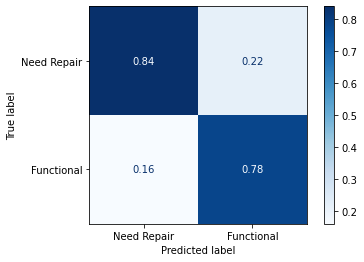

In [55]:
# evaluate catboost model
evaluate(cbc, X_train, y_train, X_val, y_val)

## Evaluation

- We are selecting the CatBoost as our final model for several reasons.

- Out of our LogisticRegression, KNN, and Decision Tree modeling efforts, the Decision Tree had the highest success rate in predicting the performance of water wells. 

- Our random forest bagging process ended up producing similar results to our Decision Tree, but the performance of the model is significantly slower, which could pose a large issue, since agencies will use the model to address critical issues.

- The CatBoost booster model uses our Decision Tree to improve the performance of our model by optimizing the categorical columns. The Decision Tree’s precision and accuracy scores were improved using the category booster, and resulted in the highest scores out of all of our models across the board. 

- Therefore, the CatBoost is the best model to select for our clients.

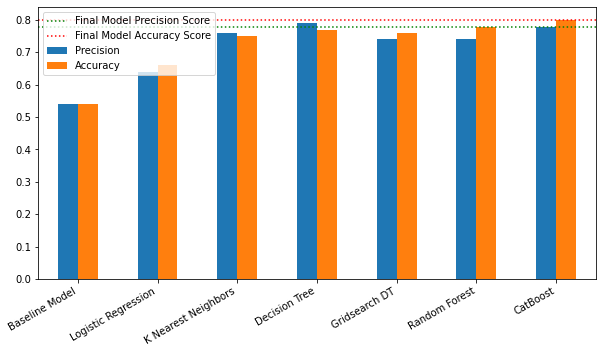

In [56]:
# visualization for how we improved our predictions
import matplotlib.pyplot as plt

#plot a bar chart with the improved modeling accuracy and precision results

index = ["Baseline Model", "Logistic Regression", "K Nearest Neighbors", "Decision Tree", "Gridsearch DT", "Random Forest", "CatBoost"]
precis = [.54, .64, .76, .79, .74, .74, .78]
accur = [.54, .66, .75, .77, .76, .78, .80]

df = pd.DataFrame({"Precision": precis, "Accuracy": accur}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,5))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');
plt.axhline(y=0.78, color='g', linestyle=':', label="precision")
plt.axhline(y=0.8, color='r', linestyle=':', label="accuracy")
plt.legend(("Final Model Precision Score", "Final Model Accuracy Score", "Precision", "Accuracy"))
plt.show()
#plot a horizontal bar chart containing the results from the feature importance exercise

### 'Final' Model: CatBoost

#### Benefits of CatBoost: 
- based on decision trees
- good with categorical data
- fast
- highly accurate

Accuracy Score:
Train - 0.8467888764185061
Test - 0.8084175084175084
  
Precision Score:
Train - 0.8251531203443139
Test - 0.789592123769339
  
Recall Score: 
Train - 0.9122477924692318
Test - 0.8780106349702846
  
F1 Score: 
Train - 0.8665174594206992
Test - 0.8314573459715641
  
ROC_AUC: 
Train - 0.8402943096571404
Test - 0.8026582522281244
  
  
Confusion matrix for test data


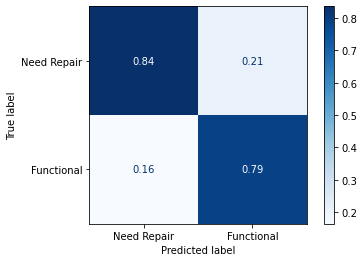

In [57]:
# code here to evaluate your final model using unseen holdout set
evaluate(cbc, X_train, y_train, X_holdout, y_holdout)

The evaluation of final holdout set proves that our model is very generalizable and not overfitted because it performs equally well on our training set and holdout set.

## Application of Final Model

#### Visualization of predictions 

- Since we have a test data set which we don't know the results of, we will use that to illustrate how to use this model to figure out where to send the maintenance team to.

#### Explore feature importance for improvement opportunities

- We can rank features by their importance but we need to do further analysis into how the features influence our result.

In [58]:
# load illustration data
X_ill = pd.read_csv('../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv', index_col='id')

In [59]:
# drop columns
X_ill = X_ill.drop(drop_columns, axis = 1)

In [60]:
# predict function/repair status using final model
prediction = cbc.predict(X_ill)

In [61]:
# add predictions to dataframe
X_ill['Status'] = prediction

In [62]:
# map 1s and 0s 'funtional' and 'need repair'
reverse_map = {1:'Functional', 0:'Need Repair'}

In [63]:
X_ill['Status']=X_ill['Status'].map(reverse_map)

In [64]:
# plot predictions on map
import plotly.express as px

In [65]:
fig = px.scatter_mapbox(X_ill,
                       lat='latitude',
                       lon='longitude',
                       color='Status') 
fig.update_layout(mapbox_style='open-street-map')
fig.show()

The yellow points are wells that are predicted as functional, the blue points are predicted as needing repair.

In [66]:
# rank feature importance
importance = cbc['classifier'].get_feature_importance()

In [67]:
# extract one hot encoded columns
ohe_cols_after = cbc['preprocessor'].transformers_[0][1]['oh_encoder'].get_feature_names(ohe_cols)

In [68]:
# check one hot encoded columns
ohe_cols_after

array(['public_meeting_False', 'public_meeting_True',
       'recorded_by_GeoData Consultants Ltd', 'permit_0', 'permit_True'],
      dtype=object)

In [69]:
columns = []
for c in num_cols:
    columns.append(c)
for c in ohe_cols_after:
    columns.append(c)
for c in freq_cols:
    columns.append(c)

In [70]:
# check if columns appended correctly
columns

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'public_meeting_False',
 'public_meeting_True',
 'recorded_by_GeoData Consultants Ltd',
 'permit_0',
 'permit_True',
 'date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'scheme_management',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type_group']

In [71]:
# zip columns with importance
dict_importance = dict(zip(columns,importance))

In [72]:
# make the dictionary into a dataframe
pd.DataFrame.from_dict(dict_importance, orient = 'index').sort_values(by=0, ascending=False)

0
extraction_type_group                27.122525
water_quality                         5.513616
waterpoint_type_group                 5.242211
management_group                      5.035640
quality_group                         4.411531
permit_True                           4.310923
payment_type                          3.818963
subvillage                            3.707412
date_recorded                         3.250245
district_code                         3.031143
source_class                          3.024066
source                                2.566224
installer                             2.484079
quantity                              2.332257
payment                               2.243253
extraction_type_class                 2.118742
permit_0                              1.972806
public_meeting_True                   1.883261
ward                                  1.708135
recorded_by_GeoData Consultants Ltd   1.527310
basin                                 1.518020
scheme_management                     1.479849
population                            1.438440
wpt_name                              1.318428
lga                                   1.076314
region                                1.002661
management                            0.877155
funder                                0.802136
construction_year                     0.792036
extraction_type                       0.505733
gps_height                            0.426536
amount_tsh                            0.375875
scheme_name                           0.345042
region_code                           0.291829
latitude                              0.226447
public_meeting_False                  0.219160
longitude                             0.000000

According to CatBoost, extraction type is the most important feature, but for a complicated model with a lot of interaction terms, this result might not be very reliable. We can further explore that in the future, but for the purpose of this predictive modeling project, we don't need that information.

## Conclusions

We recommend governmental agencies and NGOs utilize our predictive model to identify which water wells require repairs as soon as possible. Our model will allow these agencies to visualize the locations of faulty water wells, so that they can take immediate action to provide safe water access for Tanzanian citizens in danger.

Governmental agencies should collect as many updated records on these water wells as they can to maximize the full potential of the model. Records containing information about the water well location, water source, construction and technical specifications, and any previous documented maintenance efforts will maximize the efficiency of the model’s ability to predict where repairs must be prioritized.

During our model improvement process, we identified the features that had the most influence on our model’s predictions. In the future, we plan to explore in more detail how exactly each of these features manipulate our results, and if we can improve our model with these insights. We also plan to create functionality that allows end users to visualize how certain features negatively impact the performance of the water wells, so that they know what to avoid when planning wells going forward. Alternatively, we also plan to enable their ability to visualize patterns of water wells with proven longevity to use their construction and maintenance efforts as inspiration for water wells in the future.
